In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Store the cartesian product of choice 1 and choice 2
option1=['A','B','C']
option2=['A','B','C']

car_door=list(zip(*(list(itertools.product(option1,option2)))))[0]
choice=list(zip(*(list(itertools.product(option1,option2)))))[1]

In [4]:
#Create result
stay=[]
switch=[]
for i in range(len(car_door)):
    if car_door[i]==choice[i]:
        stay.append("Win car")
        switch.append("Win goat")
    else:
        stay.append("Win goat")
        switch.append("Win car")       

In [5]:
#Create data frame
dictdf={}
dictdf={"Door with car":car_door,"Choice":choice,"If stay":stay,"If switch":switch}
df=pd.DataFrame(dictdf)
df

,Door with car,Choice,If stay,If switch
0,A,A,Win car,Win goat
1,A,B,Win goat,Win car
2,A,C,Win goat,Win car
3,B,A,Win goat,Win car
4,B,B,Win car,Win goat
5,B,C,Win goat,Win car
6,C,A,Win goat,Win car
7,C,B,Win goat,Win car
8,C,C,Win car,Win goat


In [6]:
#Create function that work for multiple door
def montyHall(num_door):
    option1=[str(i) for i in list(range(num_door))]
    option2=[str(i) for i in list(range(num_door))]
    car_door=list(zip(*(list(itertools.product(option1,option2)))))[0]
    choice=list(zip(*(list(itertools.product(option1,option2)))))[1]
    stay=[]
    switch=[]
    for i in range(len(car_door)):
        if car_door[i]==choice[i]:
            stay.append(1)
            switch.append(0)
        else:
            stay.append(0)
            switch.append(1)
    return sum(switch)/len(car_door)

In [7]:
montyHall(10)

0.9

In [8]:
def MontyHallSimulation(numdoor,numrevealed):
    if numdoor-numrevealed<2:
        print("Invalid number of being door revealed!")
        print("Please enter again!!!")
        return 0

    option=list(range(numdoor))
    stay = []
    switch = []
    num_sim=10000

    for i in range(num_sim):
        car_door = np.random.choice(option)
        original_choice = np.random.choice(option)
        goat_door = list(set(option)-{car_door}-{original_choice})
        
        #Prepare to open all the door that has goat randomly
        goat_door_temp=goat_door
        door_revealed=[]
        
        #Randomly open goat door wont effect switching space
        for i in range(numrevealed):
            door_revealed.append(np.random.choice(goat_door_temp))
            goat_door_temp=list(set(goat_door_temp)-{door_revealed[i]})
        
        #The final door for switching strategy, there are 2 cases
        if_switch_list=list(set(option)-set(door_revealed)-{original_choice})
        
        #This switch is for case A:
        if_switch_A = if_switch_list[0]
        
        #Record the prize
        #Case A:      
        if numdoor-numrevealed==2:
            if if_switch_A == car_door:
                switch.append(1)
            else:
                switch.append(0)

            if original_choice == car_door:
                stay.append(1)
            else:
                stay.append(0)
        
            
        #Case B:
        elif numdoor-numrevealed>2:
            if car_door in if_switch_list:
                if_switch_B=np.random.choice(if_switch_list) #Last switch for case B
                if if_switch_B==car_door:
                    switch.append(1)
                else:
                    switch.append(0)
            else:
                switch.append(0)

            if original_choice == car_door:
                stay.append(1)
            else:
                stay.append(0)
    
    #Graph
    num_sim_list=list(range(1,num_sim+1))
    cum_mean_stay=[np.mean(stay[:i]) for i in num_sim_list] #Getting 
    cum_mean_switch=[np.mean(switch[:i]) for i in num_sim_list]
    sns.lineplot(num_sim_list,cum_mean_stay,color="darkorange",label="Staying win rate")
    sns.lineplot(num_sim_list,cum_mean_switch,color='navy',label="Switching win rate")
    plt.legend()
    plt.title("Simulated Probabilities for {} doors with {} door(s) revealed".format(numdoor,numrevealed))
    plt.show()
    print("'Staying' win rate mean:", np.mean(stay))
    print("'Switching' win rate mean:" , np.mean(switch))
    
    if (numdoor-numrevealed)==2:
        print("Exact probability for 'switching':",(numdoor-1)/numdoor)
        print("Exact probability for 'staying':",1/numdoor)
    else:
        result=(numdoor-1)/(numdoor*(numdoor-numrevealed-1))
        print("Exact probability for 'switching':",result)
        print("Exact probability for 'staying':",1/numdoor)
    

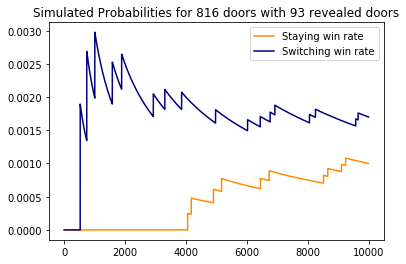

'Staying' win rate mean: 0.001
'Switching' win rate mean: 0.0017
Exact probability for 'switching': 0.0013833441964043235
Exact probability for 'staying': 0.0012254901960784314


In [19]:
MontyHallSimulation(816,93)